In [1]:
# -------------Importing libraries ---------------
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

In [2]:
# --------- Reading the dataset ------------------

data = pd.read_csv('demonetization-tweets.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [3]:
# ---------------- Dropping columns -------------------
data.drop(['Unnamed: 0','X','favorited','favoriteCount','replyToSN','truncated','replyToSID','id','replyToUID','statusSource','screenName','isRetweet'], axis =  1 , inplace = True)

In [4]:
data.head()

,text,created,retweetCount,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,2016-11-23 18:40:30,331,False
1,RT @Hemant_80: Did you vote on #Demonetization...,2016-11-23 18:40:29,66,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",2016-11-23 18:40:03,12,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,2016-11-23 18:39:59,338,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,2016-11-23 18:39:39,120,False


In [5]:
# -------- cleaning our data ------------------

# converting into lowercase 
def lower(text):
    return text.lower()


data['text'] = data['text'].apply(lower)

# lets remove punc
def remove_punc(text):
    return text.translate(str.maketrans('','', string.punctuation))

data['text'] = data['text'].apply(remove_punc)

# removing rt from every row of text 
data['text'] = data['text'].str.replace('rt','')
data.text

0         rssurjewala critical question was paytm infor...
1         hemant80 did you vote on demonetization on mo...
2         roshankar former finsec rbi dy governor cbdt ...
3         aninews gurugram haryana post office employee...
4         satishacharya reddy wedding mailtoday caoon d...
                               ...                        
14935     saxenavishakha ghost of demonetization return...
14936    n d modi fansd true nationalists of the countr...
14937     bharatbuilder lol demonetization has fixed a ...
14938     stupidosaur vidyut b team of bjp cia baby cct...
14939    vidyut b team of bjp cia baby cctv evm but wit...
Name: text, Length: 14940, dtype: object

In [6]:
data.head()

,text,created,retweetCount,retweeted
0,rssurjewala critical question was paytm infor...,2016-11-23 18:40:30,331,False
1,hemant80 did you vote on demonetization on mo...,2016-11-23 18:40:29,66,False
2,roshankar former finsec rbi dy governor cbdt ...,2016-11-23 18:40:03,12,False
3,aninews gurugram haryana post office employee...,2016-11-23 18:39:59,338,False
4,satishacharya reddy wedding mailtoday caoon d...,2016-11-23 18:39:39,120,False


In [7]:
data.drop(['retweeted'],axis= 1 , inplace = True)


In [8]:
data.sample(5)

,text,created,retweetCount
10903,nrshiralkar india is so rich bc modi had to d...,2017-04-16 17:43:35,43
10501,roflgandhi seeing munaf patel back after ages...,2017-04-17 05:39:32,165
78,ppl of india extending overwhelming supp to na...,2016-11-23 18:16:33,0
1024,atheistkrishna the effect of demonetization \...,2016-11-23 15:11:26,45
11302,roflgandhi seeing munaf patel back after ages...,2017-04-16 13:32:45,165


In [9]:
# importing vader sentiment analyzer ---------------------
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [10]:
def getSentiment(text):
    sent = analyser.polarity_scores(text)
    return sent['compound']

data['textPolarity'] = data['text'].apply(getSentiment)
data.head()

,text,created,retweetCount,textPolarity
0,rssurjewala critical question was paytm infor...,2016-11-23 18:40:30,331,0.1027
1,hemant80 did you vote on demonetization on mo...,2016-11-23 18:40:29,66,0.0000
2,roshankar former finsec rbi dy governor cbdt ...,2016-11-23 18:40:03,12,0.0000
3,aninews gurugram haryana post office employee...,2016-11-23 18:39:59,338,0.0000
4,satishacharya reddy wedding mailtoday caoon d...,2016-11-23 18:39:39,120,0.0000


In [11]:
# converting the polarity scores into categories
def analysis_score(score):
    if score >= 0.05 :
        return 'POSITIVE'
    elif ((score > -0.05) and (score <0.05)) :
        return 'NEUTRAL'
    elif score <= -0.05 :
        return 'NEGATIVE'
    
data['sent'] = data['textPolarity'].apply(analysis_score)
data.sample(5)

,text,created,retweetCount,textPolarity,sent
4007,putting nation over pay politics nitishkumar s...,2016-11-23 06:28:21,0,-0.1027,NEGATIVE
5865,suppo from common mass of india to demonetizat...,2016-11-22 17:19:28,0,0.0000,NEUTRAL
13137,pranesh jamewils cashlessconsumr logic anivar ...,2017-04-14 12:02:13,0,0.3612,POSITIVE
3897,thedarjchron demonetization effect 21 lakh te...,2016-11-23 06:39:31,15,0.2960,POSITIVE
1577,gauravcsawant rs 40 lakh looted from a bank i...,2016-11-23 13:04:00,637,-0.6249,NEGATIVE


POSITIVE    5537
NEUTRAL     5233
NEGATIVE    4170
Name: sent, dtype: int64


<AxesSubplot: xlabel='sent', ylabel='count'>

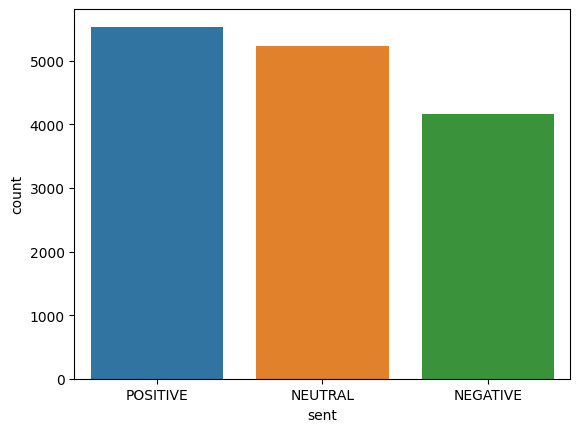

In [12]:
# lets plot some graphs 
print(data.sent.value_counts())
sns.countplot(x = 'sent' , data = data )

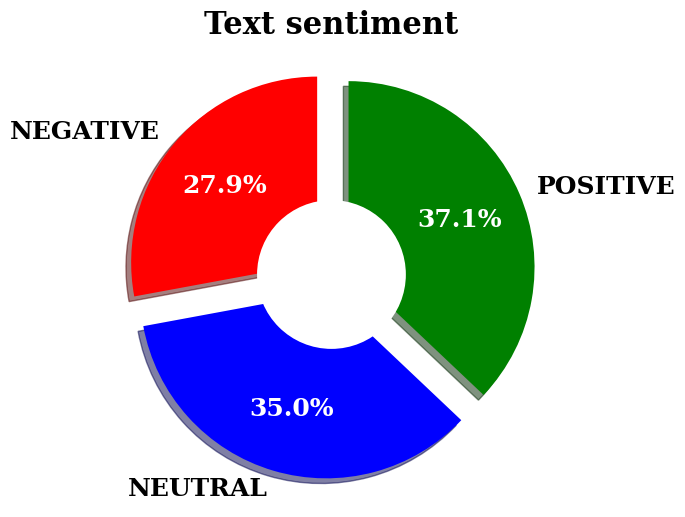

In [17]:
label_data = data.sent.value_counts().sort_index()

explode = (0.1,0.1,0.1)

plt.figure(figsize = (6,8))

patches , texts , pcts = plt.pie(label_data,
                                
                                colors = ['red','blue','green'],
                                labels = label_data.index ,
                                pctdistance = 0.65 , 
                                shadow = True , 
                                startangle = 90 , 
                                explode = explode ,
                                autopct = '%1.1f%%',
                                textprops = {
                                    'fontsize' : 18, 
                                    'color' : 'black' ,
                                    'weight' : 'bold' ,
                                    'family' : 'serif'
                                }
                                
                                
                                
                                )
plt.setp(pcts , color = 'white')
hfont = {'fontname' : 'serif' , 'weight': 'bold'}
plt.title('Text sentiment', size = 22 ,**hfont)
centre_circle = plt.Circle((0,0) , 0.40 , fc = 'white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

In [33]:
# lets train a model for predicting sentiment from further newer texts     
# creating bag of words 
cv = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

In [26]:
# lemmatizing and stemming the text data and storing into corpus ------

corpus = []
ps=PorterStemmer()
for i in range(len(data.text)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])         # Removing special characters from text(message)
    review = review.lower()                                  # Converting entire text into lower case
    review = review.split()                                  # Splitting our text into words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]             # Stemming and removing stopwords
    review = ' '.join(review)                                # Joining all the words into a comple text
    corpus.append(review) 

In [28]:
# selecting the training and testing data 
X = cv.fit_transform(corpus)
y=data['sent']


In [29]:
print('No. of feature_words: ', len(cv.get_feature_names_out()))

No. of feature_words:  46432


In [30]:
# diving the data into training set and testing set ------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [31]:
# ------ models which been used for testing --------

model1=LogisticRegression()
model2=BernoulliNB()
model3=LinearSVC()
model=[model1, model2, model3]

In [32]:
i = 0
for algo in model:
  i += 1
  print("M-O-D-E-L :",i)
  algo.fit(X_train, y_train)
  y_pred=algo.predict(X_test)
  # Checking the accuracy
  print("Confusion matrix : \n",confusion_matrix(y_pred,y_test))
  print("Accuracy score : ",accuracy_score(y_pred,y_test))
  print("Classification Report : \n",classification_report(y_pred,y_test))
  print("-----------------------------------------------------------\n")

M-O-D-E-L : 1


E:\python main\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix : 
 [[1093   54   68]
 [  93 1450  106]
 [  37   33 1548]]
Accuracy score :  0.9127621597501115
Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.90      0.90      1215
     NEUTRAL       0.94      0.88      0.91      1649
    POSITIVE       0.90      0.96      0.93      1618

    accuracy                           0.91      4482
   macro avg       0.91      0.91      0.91      4482
weighted avg       0.91      0.91      0.91      4482

-----------------------------------------------------------

M-O-D-E-L : 2
Confusion matrix : 
 [[1089   70   97]
 [ 101 1434  114]
 [  33   33 1511]]
Accuracy score :  0.9000446229361893
Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.87      0.88      1256
     NEUTRAL       0.93      0.87      0.90      1649
    POSITIVE       0.88      0.96      0.92      1577

    accuracy                           0.90     

# Insights : As we see the quantity of positive sentiment is 47% , Negative sentiment is 27.9%  and neutral is 35 % 

# & the linear svc model is looking good for training and predicting sentiments of new texts giving 92.25% Accuracy score